# Unit 4: Applied Machine Learning 2
## Task 2: PCA Analysis and Clustering
###### Candelaria Retamal
###### **21.06.2022**


In [1]:
import numpy as np
import os

# Load data
with np.load("features_trainset.npz") as npz_file:
    X = npz_file["data"]
    y = npz_file["label"]

print("X:", X.shape, X.dtype)
print("y:", y.shape, y.dtype)

X: (280, 1280) float32
y: (280, 6) float32


#### 2.1. Scree plot
Apply PCA analysis on the training dataset. Make a scree plot, how many PCA components explain 10%, 20%, …, 90% and 100% of the variance?

---

> **Solution**: In the folllowing lines we will make the scree plot. For accomplishing this task we will fit the X variable (data), without transforming it, as it has already been transformed in the previous steps. Through this steps we will be able to see how many components explain different percentages of variance.

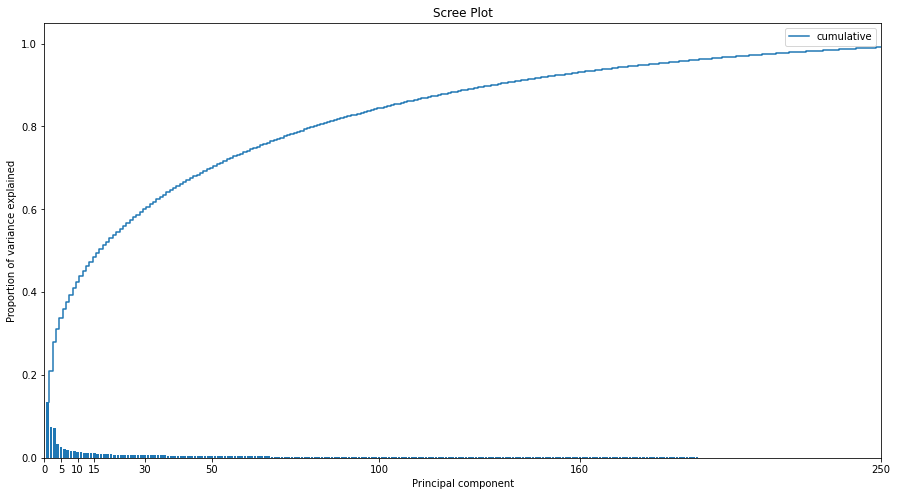

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

import numpy as np

# Create PCA transformer
pca3 = PCA(n_components=None)

# Apply PCA to rescaled data
pca3.fit(X)

# Proportion of variance explained
pve = pca3.explained_variance_ratio_
pve

# Create bar plot
xcor = np.arange(1, len(pve) + 1)  # 1,2,..,n_components
plt.figure(figsize = [15, 8])
plt.bar(xcor, pve)
plt.xticks(xcor)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    xcor + 0.5,  # 1.5,2.5,..,n_components+0.5
    pve_cumsum,  # Cumulative sum
    label="cumulative",
)

# Add labels
plt.xlabel("Principal component")
plt.ylabel("Proportion of variance explained")
plt.legend()
plt.title("Scree Plot")
plt.xlim(0,250)
plt.xticks([0,5,10, 15, 30, 50,100,160,250])
plt.show()

**Observations:** If we take a look at the Scree plot, we may see that only 1 feature explains more than a 10% of the variance, 2 features explain the 20%, 5 features the 30%, 10 features the 40%, 15 features the 50%, 30 features the 60%, 50 features the 70%, 100 features the 80%, 160 features the 90% and near 250 features could explain a 100% of the variance.

#### 2.2. Data vizualization of the first 2 PCA components
After transforming the training dataset using the first two PCA components, visualize the transformed data on a 2D-plot and use 6 different colors to designate the 6 categories. What can you say about the results?

---

> **Solution**: Let's now take a look at the fisrt 2 PCA components. In the folllowing lines we will take a look at the six available categories

In [3]:
y_num=(np.argmax(y, axis=1))

In [4]:
from sklearn.decomposition import PCA

# Compute first two principal components
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

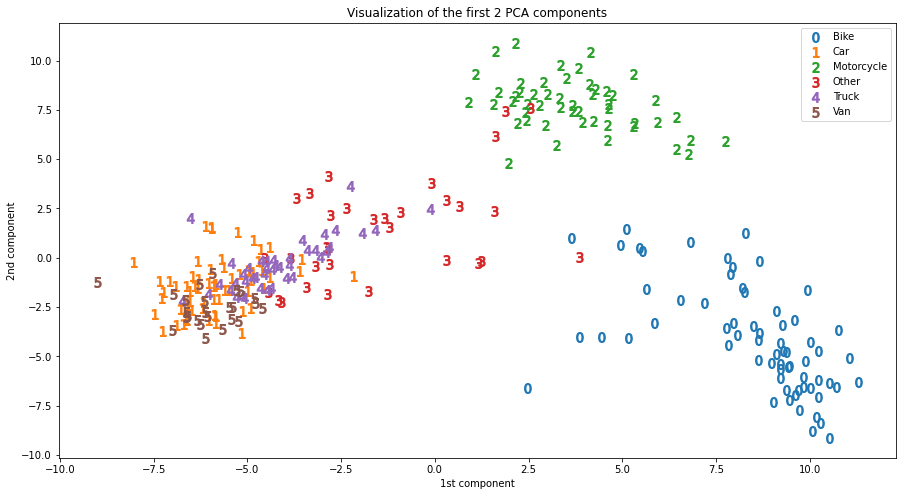

In [5]:
%matplotlib inline
#%config InlineBackend.figure_format ='retina' # For retina screens (mac)
import matplotlib.pyplot as plt

# Compute component scores of 500 images
digits_components = pca.transform(X)
digits_label = y_num
plt.figure(figsize = [15, 8])
# Group images by digit
for label in range(6):  # 0,1,2,3..9
    # Images of this digit
    idx = digits_label == label

    # Plot images
    
    plt.scatter(
        digits_components[idx, 0],
        digits_components[idx, 1],
        marker="${}$".format(label),
        s=100,  # Size of each marker
    )

# Add legend and labels
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.legend(["Bike","Car","Motorcycle","Other","Truck", "Van"])
plt.title("Visualization of the first 2 PCA components")
plt.show()

**Observations:** The clases 0 (bike) and 2 (motorcycle)  present clear clusters, while there exists a high overlap for the rest of the classes. The biggest separation problems may be spotted between the classes Car, truck and van.

#### 2.3. k-means clustering
On the 2D transformed training data, apply k-means clustering with k equals 6. Plot the same 2D-plot as above but this time use the colors to distinguish between the six clusters obtained by k-means. Do the 6 clusters of k-means align with the 6 categories from above?

---

> **Solution**: We will now implement the clustering strategy for making a comparison with the results obtained through the PCA bi dimensional analysis.

In [6]:
from sklearn.cluster import KMeans

# Create k-means object
kmeans = KMeans(n_clusters=6, random_state=0)  # Fix results
# Fit it to the data
kmeans.fit(digits_components, y=None)

KMeans(n_clusters=6, random_state=0)

In [7]:
# Get clusters
kmeans.labels_
# Get centroids
kmeans.cluster_centers_

array([[-6.183809  , -2.2741456 ],
       [ 6.4674025 , -1.457512  ],
       [-1.215976  ,  2.0695174 ],
       [ 3.6178346 ,  7.7387714 ],
       [-4.3918777 , -0.40447348],
       [ 9.608347  , -5.7438645 ]], dtype=float32)

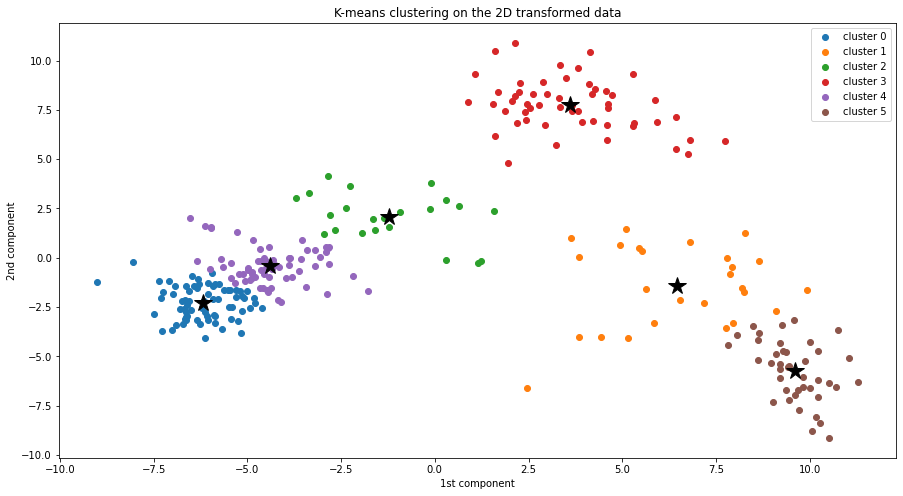

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = [15, 8])
# Plot clusters
for cluster in [0, 1, 2, 3, 4, 5]:
    # Get points in this cluster
    idx = kmeans.labels_ == cluster

    # Plot points
    plt.scatter(
        digits_components[idx, 0],
        digits_components[idx, 1],
        marker="o",
        label="cluster {}".format(cluster),
    )

    # Plot centroid
    centroid = kmeans.cluster_centers_[cluster]
    plt.plot(centroid[0], centroid[1], marker="*", color="black", markersize=18)

# Add legend and labels
plt.legend()
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.title("K-means clustering on the 2D transformed data")
plt.show()

**Observations:** We may see from the clustering analysis that groups are similar to the ones created through the PCA analysis. Yet, in green and purple we may see two groups that in the previous analysys were only considered to belong to one same class. The division of the clusters 3 and 5 is much clearer thant the one obtained through the PCA.

#### 2.4. Data transformation and evaluation of classifying tasks
Using the first two PCA components obtained form the training dataset, transform the test dataset. Visualize the transformed data on a 2D-plot and use 6 different colors to designate the 6 categories. Based on this visualization, how many sample in the test dataset you think might be hard to classify?

---

> **Solution**: For performing the requested transformation we will use pca fit that comes from the section 2.2, and we will transform the X_test variables, that have been extracted from the .npz file. Finally, we will take a look at the clusters that have been created using this technique.

X: (50, 1280) float32
y: (50, 6) float32


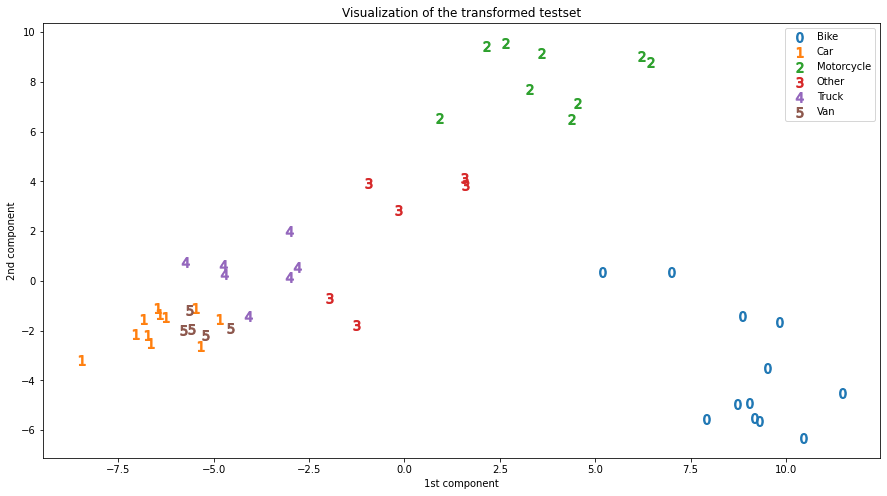

In [9]:
import numpy as np
import os

# Load data
with np.load("features_testset.npz") as npz_file:
    X_t = npz_file["data"]
    y_t = npz_file["label"]

print("X:", X_t.shape, X_t.dtype)
print("y:", y_t.shape, y_t.dtype)

%matplotlib inline
#%config InlineBackend.figure_format ='retina' # For retina screens (mac)
import matplotlib.pyplot as plt

y_num_t=(np.argmax(y_t, axis=1))
# Compute component scores of 500 images
digits_components = pca.transform(X_t)
digits_label = y_num_t
plt.figure(figsize = [15, 8])
# Group images by digit
for label in range(6):  # 0,1,2,3..9
    # Images of this digit
    idx = digits_label == label

    # Plot images
    
    plt.scatter(
        digits_components[idx, 0],
        digits_components[idx, 1],
        marker="${}$".format(label),
        s=100,  # Size of each marker
    )

# Add legend and labels
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.legend(["Bike","Car","Motorcycle","Other","Truck", "Van"])
plt.title("Visualization of the transformed testset")
plt.show()

**Observations:** By taking a look at the results we may see that the main classification problems may be found in the car samples (1) that are too near to the Van samples (5). There are 3 samples that belong to 1, that could be misclassified as 5. It may be also difficult to assocaite the other samples(3) that are too near to the truck samples(4) as part of the class 3 and not the class 4. Finally, there are 2 bike samples(0) that are far from the main focal group. That makes a total of 7 possible samples that could be misclassified by using this strategy.